In [123]:
pip install pybaseball

Note: you may need to restart the kernel to use updated packages.


In [141]:
import pandas as pd
import pybaseball
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from pybaseball import statcast
from pybaseball import playerid_lookup, statcast_pitcher
import matplotlib.pyplot as plt
import seaborn as sns


In [224]:
player_info = playerid_lookup('Manaea', 'Sean')
player_id = player_info['key_mlbam'].values[0]
brasier_data = statcast_pitcher(start_date, end_date, player_id)
print(f"Player ID for Ryan Brasier: {player_id}")

Gathering Player Data
Player ID for Ryan Brasier: 640455


In [144]:
brasier_data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [225]:
start_date = '2023-04-01'
end_date = '2023-08-10'
data_pitch_speed = statcast(start_dt=start_date, end_dt=end_date)
selected_columns = [
    'pitch_type', 'stand', 'p_throws', 
    'balls', 'strikes', 'game_year', 'outs_when_up', 'inning', 
    'pitch_number', 'bat_score', 'effective_speed', 'pfx_x',
    'pfx_z', 'batter', 'pitcher',
    'fld_score'
]
filtered_data = data_pitch_speed[selected_columns]
effective_speed_data = filtered_data[filtered_data['pitcher'] == 640455]
effective_speed_data

This is a large query, it may take a moment to complete


/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/132 [00:00<?, ?it/s]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly

,pitch_type,stand,p_throws,balls,strikes,game_year,outs_when_up,inning,pitch_number,bat_score,effective_speed,pfx_x,pfx_z,batter,pitcher,fld_score
775,FF,R,L,0,2,2023,0,6,3,0,94.0,1.17,1.02,650859,640455,1
786,FF,R,L,0,1,2023,0,6,2,0,93.5,1.21,0.95,650859,640455,1
811,ST,R,L,0,0,2023,0,6,1,0,77.6,-0.79,0.02,650859,640455,1
838,FF,R,L,1,2,2023,2,5,4,0,95.0,1.18,0.71,545341,640455,1
878,ST,R,L,1,1,2023,2,5,3,0,78.6,-1.55,0.29,545341,640455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,FF,L,L,3,1,2023,0,7,5,0,97.2,1.11,0.97,643217,640455,7
4108,FF,L,L,3,0,2023,0,7,4,0,96.9,1.18,0.88,643217,640455,7
4303,FF,L,L,2,0,2023,0,7,3,0,98.3,1.16,0.86,643217,640455,7
4454,FF,L,L,1,0,2023,0,7,2,0,97.3,1.16,0.93,643217,640455,7


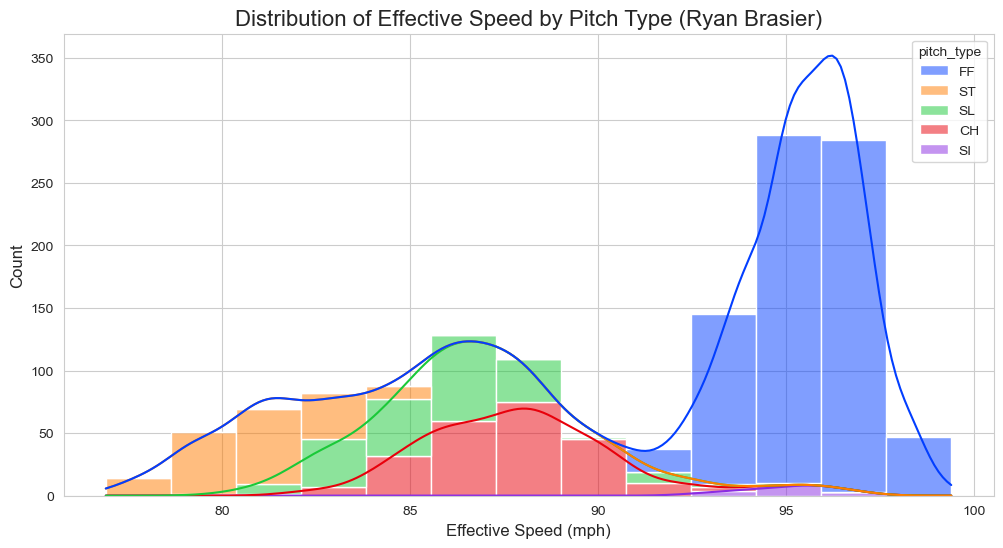

In [226]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.histplot(
    data=effective_speed_data, 
    x='effective_speed', 
    hue='pitch_type', 
    kde=True,
    palette='bright', 
    multiple='stack'
)

plt.title('Distribution of Effective Speed by Pitch Type (Ryan Brasier)', fontsize=16)
plt.xlabel('Effective Speed (mph)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [209]:
effective_speed_data = effective_speed_data.sort_values(by=['game_year', 'inning', 'pitch_number'])
effective_speed_data['previous_effective_speed'] = effective_speed_data['effective_speed'].shift(1)
effective_speed_data['previous_pfx_x'] = effective_speed_data['pfx_x'].shift(1)
effective_speed_data['previous_pfx_z'] = effective_speed_data['pfx_z'].shift(1)
effective_speed_data = effective_speed_data.iloc[1:]
effective_speed_data = effective_speed_data.drop(columns=['pfx_x', 'effective_speed', 'pfx_z'])

In [227]:
effective_speed_data

,pitch_type,stand,p_throws,balls,strikes,game_year,outs_when_up,inning,pitch_number,bat_score,effective_speed,pfx_x,pfx_z,batter,pitcher,fld_score
775,FF,R,L,0,2,2023,0,6,3,0,94.0,1.17,1.02,650859,640455,1
786,FF,R,L,0,1,2023,0,6,2,0,93.5,1.21,0.95,650859,640455,1
811,ST,R,L,0,0,2023,0,6,1,0,77.6,-0.79,0.02,650859,640455,1
838,FF,R,L,1,2,2023,2,5,4,0,95.0,1.18,0.71,545341,640455,1
878,ST,R,L,1,1,2023,2,5,3,0,78.6,-1.55,0.29,545341,640455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,FF,L,L,3,1,2023,0,7,5,0,97.2,1.11,0.97,643217,640455,7
4108,FF,L,L,3,0,2023,0,7,4,0,96.9,1.18,0.88,643217,640455,7
4303,FF,L,L,2,0,2023,0,7,3,0,98.3,1.16,0.86,643217,640455,7
4454,FF,L,L,1,0,2023,0,7,2,0,97.3,1.16,0.93,643217,640455,7


In [228]:
X = effective_speed_data.drop(columns=['pitch_type', 'pitcher'])
y = effective_speed_data['pitch_type']

X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top features for predicting pitch type:")
print(feature_importances.head(30))

Top features for predicting pitch type:
effective_speed    0.369459
pfx_x              0.280564
pfx_z              0.197272
inning             0.029421
batter             0.026396
bat_score          0.022863
fld_score          0.017404
pitch_number       0.011715
stand_R            0.009979
outs_when_up       0.009522
balls              0.009185
stand_L            0.009078
strikes            0.007142
game_year          0.000000
p_throws_L         0.000000
dtype: float64


In [229]:
le_stand = LabelEncoder()
le_p_throws = LabelEncoder()
le_pitch_type = LabelEncoder()
le_stand.fit(['R', 'L'])
le_p_throws.fit(['R', 'L'])
le_pitch_type.fit(effective_speed_data['pitch_type'])
effective_speed_data['stand'] = le_stand.transform(effective_speed_data['stand'])
effective_speed_data['p_throws'] = le_p_throws.transform(effective_speed_data['p_throws'])
effective_speed_data['pitch_type_encoded'] = le_pitch_type.transform(effective_speed_data['pitch_type'])
X = effective_speed_data.drop(['pitch_type', 'pitcher'], axis=1)
y = effective_speed_data['pitch_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/996886157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['stand'] = le_stand.transform(effective_speed_data['stand'])
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/996886157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['p_throws'] = le_p_throws.transform(effective_speed_data['p_throws'])
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/996886157.py:9: Sett

RandomForestClassifier(random_state=42)

In [201]:
def predict_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, Previous_effective_speed, Previous_pfx_x, previous_pfx_z):

    current_game = pd.DataFrame([{
        'stand': 'R',
        'p_throws': 'L',
        'balls': balls,
        'strikes': strikes,
        'game_year': 2023,
        'outs_when_up': outs_when_up,
        'inning': inning,
        'pitch_number': Pitch_number,
        'bat_score': Bat_score,
        'fld_score': Fld_score,
        'previous_effective_speed': Previous_effective_speed,
        'previous_pfx_x': Previous_pfx_x,
        'previous_pfx_z': previous_pfx_z
    }])
    
    current_game['stand'] = le_stand.transform(current_game['stand'])
    current_game['p_throws'] = le_p_throws.transform(current_game['p_throws'])

    current_game = pd.get_dummies(current_game)

    missing_cols = set(X.columns) - set(current_game.columns)
    for col in missing_cols:
        current_game[col] = 0 

    current_game = current_game[X.columns]

    probabilities = model.predict_proba(current_game)[0]

    pitch_type_probs = dict(zip(model.classes_, probabilities))
    
    return pitch_type_probs

balls = 2
strikes = 2
Pitch_number = 4
outs_when_up = 2
inning = 8
Bat_score = 9
Fld_score = 7
Previous_effective_speed = 86
Previous_pfx_x = 0.29
previous_pfx_z = 0.48

pitch_type_probs = predict_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, Previous_effective_speed, Previous_pfx_x, previous_pfx_z)

print("Predicted probabilities for each pitch type:")
print(pitch_type_probs)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- effective_speed
- p_throws_R
- pfx_x
- pfx_z
- stand_L
- ...
Feature names seen at fit time, yet now missing:
- p_throws
- pitch_type_encoded
- previous_effective_speed
- previous_pfx_x
- previous_pfx_z
- ...


In [217]:
effective_speed_data2 = effective_speed_data.copy()
effective_speed_data2

,pitch_type,stand,p_throws,balls,strikes,game_year,outs_when_up,inning,pitch_number,bat_score,effective_speed,pfx_x,pfx_z,batter,pitcher,fld_score,pitch_type_encoded
2375,FF,0,1,2,2,2023,2,7,6,0,97.4,-0.35,1.42,672695,518489,4,1
2414,FF,0,1,2,2,2023,2,7,5,0,97.8,-0.56,1.18,672695,518489,4,1
2495,FF,0,1,1,2,2023,2,7,4,0,97.3,-0.23,1.35,672695,518489,4,1
2564,SL,0,1,0,2,2023,2,7,3,0,86.0,0.46,-0.14,672695,518489,4,3
2597,SL,0,1,0,1,2023,2,7,2,0,85.5,0.47,-0.23,672695,518489,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,FF,1,1,2,2,2023,0,9,5,7,96.2,-0.52,1.22,641511,518489,6,1
4140,FF,1,1,1,2,2023,0,9,4,7,95.5,-0.7,1.33,641511,518489,6,1
4293,SL,1,1,0,2,2023,0,9,3,7,86.5,0.48,-0.09,641511,518489,6,3
4483,SL,1,1,0,1,2023,0,9,2,7,88.2,0.33,0.87,641511,518489,6,3


In [ ]:

y_speed = effective_speed_data2['previous_effective_speed']
X_speed = effective_speed_data2.drop(['previous_effective_speed', 'pitch_type', 'pitcher'], axis=1)

X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X_speed, y_speed, test_size=0.2, random_state=42)

rf_model_speed = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_speed.fit(X_train_speed, y_train_speed)

def predict_pitch_type_and_speed(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, Previous_effective_speed, Previous_pfx_x, previous_pfx_z):
    current_game2 = pd.DataFrame([{
        'stand': 'R',
        'p_throws': 'L', 
        'balls': balls,
        'strikes': strikes,
        'game_year': 2023,
        'outs_when_up': outs_when_up,
        'inning': inning,
        'pitch_number': Pitch_number,
        'bat_score': Bat_score,
        'fld_score': Fld_score,
        'previous_effective_speed': Previous_effective_speed,
        'previous_pfx_x': Previous_pfx_x,
        'previous_pfx_z': previous_pfx_z
    }])
    
    current_game2['stand'] = le_stand.transform(current_game2['stand'])
    current_game2['p_throws'] = le_p_throws.transform(current_game2['p_throws'])

    current_game2 = pd.get_dummies(current_game2)

    missing_cols = set(X.columns) - set(current_game2.columns)
    for col in missing_cols:
        current_game2[col] = 0

    # Reorder columns to match training set
    current_game2 = current_game2[X.columns]

    # Predict probabilities for pitch types
    pitch_type_probabilities = model.predict_proba(current_game2)[0]
    pitch_type_probs = dict(zip(model.classes_, pitch_type_probabilities))

    # Predict effective speed for each pitch type using the updated RandomForestRegressor
    predicted_speeds = {}
    for pitch_type in pitch_type_probs.keys():
        current_game_speed = current_game2.copy()
        current_game_speed['pitch_type_encoded'] = le_pitch_type.transform([pitch_type])[0]  # Add encoded pitch type as a feature

        # Ensure the columns match the training data for the regressor model
        missing_cols_speed = set(X_speed.columns) - set(current_game_speed.columns)
        for col in missing_cols_speed:
            current_game_speed[col] = 0  # add missing columns with default value 0
        current_game_speed = current_game_speed[X_speed.columns]

        # Predict effective speed using RandomForestRegressor
        effective_speed_prediction = rf_model_speed.predict(current_game_speed)[0]
        predicted_speeds[pitch_type] = effective_speed_prediction

    return pitch_type_probs, predicted_speeds

# Test values
balls = balls
strikes = strikes
Pitch_number = Pitch_number
outs_when_up = outs_when_up
inning = inning
Bat_score = Bat_score
Fld_score = Fld_score
Previous_effective_speed = Previous_effective_speed
Previous_pfx_x = Previous_pfx_x
previous_pfx_z = previous_pfx_z

# Predict pitch type probabilities and effective speed
try:
    pitch_type_probs, predicted_speeds = predict_pitch_type_and_speed(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, Previous_effective_speed, Previous_pfx_x, previous_pfx_z)
except ValueError as e:
    print(f"Error during prediction: {e}")

# Create a DataFrame from pitch_type_probs and predicted_speeds
def create_prediction_dataframe(pitch_type_probs, predicted_speeds):
    # Convert pitch type probabilities and predicted speeds into DataFrame
    df = pd.DataFrame({
        'Pitch Type': list(pitch_type_probs.keys()),
        'Probability': list(pitch_type_probs.values()),
        'Predicted Effective Speed': list(predicted_speeds.values())
    })

    return df

# Create a DataFrame for the predicted probabilities and effective speeds
if 'pitch_type_probs' in locals() and 'predicted_speeds' in locals():
    prediction_df = create_prediction_dataframe(pitch_type_probs, predicted_speeds)
    # Display the DataFrame
    print("Prediction DataFrame:")
    print(prediction_df)


Prediction DataFrame:
  Pitch Type  Probability  Predicted Effective Speed
0         FC         0.17                     88.898
1         FF         0.62                     88.786
2         SI         0.14                     88.747
3         SL         0.07                     88.579


In [ ]:
def create_prediction_dataframe(pitch_type_probs, predicted_speeds):
    df = pd.DataFrame({
        'Pitch Type': list(pitch_type_probs.keys()),
        'Probability': list(pitch_type_probs.values()),
        'Predicted Effective Speed': list(predicted_speeds.values())
    })

    return df

prediction_df = create_prediction_dataframe(pitch_type_probs, predicted_speeds)

print("Prediction DataFrame:")
prediction_df

Prediction DataFrame:


,Pitch Type,Probability,Predicted Effective Speed
0,FC,0.17,88.898
1,FF,0.62,88.786
2,SI,0.14,88.747
3,SL,0.07,88.579


Bellow Cell is testing normal df (no previous pitches/shifts)

In [230]:
def predict_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, effective_speed, pfx_x, pfx_z):

    current_game = pd.DataFrame([{
        'stand': 'R',
        'p_throws': 'L',
        'balls': balls,
        'strikes': strikes,
        'game_year': 2023,
        'outs_when_up': outs_when_up,
        'inning': inning,
        'pitch_number': Pitch_number,
        'bat_score': Bat_score,
        'fld_score': Fld_score,
        'effective_speed': effective_speed,
        'pfx_x': pfx_x,
        'pfx_z': pfx_z
    }])
    
    current_game['stand'] = le_stand.transform(current_game['stand'])
    current_game['p_throws'] = le_p_throws.transform(current_game['p_throws'])

    current_game = pd.get_dummies(current_game)

    missing_cols = set(X.columns) - set(current_game.columns)
    for col in missing_cols:
        current_game[col] = 0 

    current_game = current_game[X.columns]

    probabilities = model.predict_proba(current_game)[0]

    pitch_type_probs = dict(zip(model.classes_, probabilities))
    
    return pitch_type_probs

balls = 2
strikes = 2
Pitch_number = 4
outs_when_up = 2
inning = 8
Bat_score = 9
Fld_score = 7
effective_speed = 86
pfx_x = 0.29
pfx_z = 0.48

pitch_type_probs = predict_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, effective_speed, pfx_x, pfx_z)

print("Predicted probabilities for each pitch type:")
print(pitch_type_probs)



Predicted probabilities for each pitch type:
{'CH': 0.63, 'FF': 0.05, 'SI': 0.0, 'SL': 0.2, 'ST': 0.12}


Bellow Cell is testing normal df (no previous pitches/shifts)

In [222]:

y_speed = effective_speed_data2['effective_speed']
X_speed = effective_speed_data2.drop(['effective_speed', 'pitch_type', 'pitcher'], axis=1)

X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X_speed, y_speed, test_size=0.2, random_state=42)

rf_model_speed = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_speed.fit(X_train_speed, y_train_speed)

def predict_pitch_type_and_speed(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, effective_speed, pfx_x, pfx_z):
    current_game2 = pd.DataFrame([{
        'stand': 'R',
        'p_throws': 'L', 
        'balls': balls,
        'strikes': strikes,
        'game_year': 2023,
        'outs_when_up': outs_when_up,
        'inning': inning,
        'pitch_number': Pitch_number,
        'bat_score': Bat_score,
        'fld_score': Fld_score,
        'effective_speed': effective_speed,
        'pfx_x': pfx_x,
        'pfx_z': pfx_z
    }])
    
    current_game2['stand'] = le_stand.transform(current_game2['stand'])
    current_game2['p_throws'] = le_p_throws.transform(current_game2['p_throws'])

    current_game2 = pd.get_dummies(current_game2)

    missing_cols = set(X.columns) - set(current_game2.columns)
    for col in missing_cols:
        current_game2[col] = 0

    # Reorder columns to match training set
    current_game2 = current_game2[X.columns]

    # Predict probabilities for pitch types
    pitch_type_probabilities = model.predict_proba(current_game2)[0]
    pitch_type_probs = dict(zip(model.classes_, pitch_type_probabilities))

    # Predict effective speed for each pitch type using the updated RandomForestRegressor
    predicted_speeds = {}
    for pitch_type in pitch_type_probs.keys():
        current_game_speed = current_game2.copy()
        current_game_speed['pitch_type_encoded'] = le_pitch_type.transform([pitch_type])[0]  # Add encoded pitch type as a feature

        # Ensure the columns match the training data for the regressor model
        missing_cols_speed = set(X_speed.columns) - set(current_game_speed.columns)
        for col in missing_cols_speed:
            current_game_speed[col] = 0  # add missing columns with default value 0
        current_game_speed = current_game_speed[X_speed.columns]

        # Predict effective speed using RandomForestRegressor
        effective_speed_prediction = rf_model_speed.predict(current_game_speed)[0]
        predicted_speeds[pitch_type] = effective_speed_prediction

    return pitch_type_probs, predicted_speeds

# Test values
balls = balls
strikes = strikes
Pitch_number = Pitch_number
outs_when_up = outs_when_up
inning = inning
Bat_score = Bat_score
Fld_score = Fld_score
effective_speed = effective_speed
pfx_x = pfx_x
pfx_z = pfx_z

# Predict pitch type probabilities and effective speed
try:
    pitch_type_probs, predicted_speeds = predict_pitch_type_and_speed(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, effective_speed, pfx_x, pfx_z)
except ValueError as e:
    print(f"Error during prediction: {e}")

# Create a DataFrame from pitch_type_probs and predicted_speeds
def create_prediction_dataframe(pitch_type_probs, predicted_speeds):
    # Convert pitch type probabilities and predicted speeds into DataFrame
    df = pd.DataFrame({
        'Pitch Type': list(pitch_type_probs.keys()),
        'Probability': list(pitch_type_probs.values()),
        'Predicted Effective Speed': list(predicted_speeds.values())
    })

    return df

# Create a DataFrame for the predicted probabilities and effective speeds
if 'pitch_type_probs' in locals() and 'predicted_speeds' in locals():
    prediction_df = create_prediction_dataframe(pitch_type_probs, predicted_speeds)
    # Display the DataFrame
    print("Prediction DataFrame:")
    print(prediction_df)

def create_prediction_dataframe(pitch_type_probs, predicted_speeds):
    df = pd.DataFrame({
        'Pitch Type': list(pitch_type_probs.keys()),
        'Probability': list(pitch_type_probs.values()),
        'Predicted Effective Speed': list(predicted_speeds.values())
    })

    return df

prediction_df = create_prediction_dataframe(pitch_type_probs, predicted_speeds)

print("Prediction DataFrame:")
prediction_df


Prediction DataFrame:
  Pitch Type  Probability  Predicted Effective Speed
0         FC         0.47                     91.593
1         FF         0.05                     91.993
2         SI         0.00                     91.675
3         SL         0.48                     87.831
Prediction DataFrame:


,Pitch Type,Probability,Predicted Effective Speed
0,FC,0.47,91.593
1,FF,0.05,91.993
2,SI,0.00,91.675
3,SL,0.48,87.831


In [234]:
def safe_transform(encoder, value):
    """Safely transforms a value using the encoder.
    If the value is not found in the encoder's classes_, return -1."""
    if value in encoder.classes_:
        return encoder.transform([value])[0]
    else:
        return -1

effective_speed_data['stand'] = effective_speed_data['stand'].astype(str)
effective_speed_data['p_throws'] = effective_speed_data['p_throws'].astype(str)
effective_speed_data['pitch_type'] = effective_speed_data['pitch_type'].astype(str)

le_stand = LabelEncoder()
le_p_throws = LabelEncoder()
le_pitch_type = LabelEncoder() 

le_stand.fit(effective_speed_data['stand'])
le_p_throws.fit(effective_speed_data['p_throws'])
le_pitch_type.fit(effective_speed_data['pitch_type'])

effective_speed_data['stand'] = le_stand.transform(effective_speed_data['stand'])
effective_speed_data['p_throws'] = le_p_throws.transform(effective_speed_data['p_throws'])
effective_speed_data['pitch_type'] = le_pitch_type.transform(effective_speed_data['pitch_type'])

X = effective_speed_data.drop(['effective_speed', 'pitcher'], axis=1)
y = effective_speed_data['effective_speed']

X = X.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

speed_model = RandomForestRegressor(n_estimators=100, random_state=42)
speed_model.fit(X_train, y_train)

def predict_effective_speed_by_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, effective_speed, pfx_x, pfx_z):
    pitch_types = effective_speed_data['pitch_type'].unique() 
    pitch_type_predictions = {} 

    for pitch_type in pitch_types:
        current_game = pd.DataFrame([{
        'stand': 'R',
        'p_throws': 'L', 
        'balls': balls,
        'strikes': strikes,
        'game_year': 2023,
        'outs_when_up': outs_when_up,
        'inning': inning,
        'pitch_number': Pitch_number,
        'bat_score': Bat_score,
        'fld_score': Fld_score,
        'effective_speed': effective_speed,
        'pfx_x': pfx_x,
        'pfx_z': pfx_z
        }])

        predicted_speed = speed_model.predict(current_game)[0]
        pitch_type_predictions[le_pitch_type.inverse_transform([pitch_type])[0]] = predicted_speed

    predictions_df = pd.DataFrame(
        pitch_type_predictions.items(), columns=['Pitch Type', 'Predicted Effective Speed']
    ).sort_values(by='Predicted Effective Speed', ascending=False).reset_index(drop=True)

    return predictions_df

balls = balls
strikes = strikes
Pitch_number = Pitch_number
outs_when_up = outs_when_up
inning = inning
Bat_score = Bat_score
Fld_score = Fld_score
effective_speed = effective_speed
pfx_x = pfx_x
pfx_z = pfx_z
predictions_df = predict_effective_speed_by_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, effective_speed, pfx_x, pfx_z)

predictions_df


/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/2308754937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['stand'] = effective_speed_data['stand'].astype(str)
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/2308754937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['p_throws'] = effective_speed_data['p_throws'].astype(str)
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/2308754937.py:11: SettingWithCopyWar

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- effective_speed
Feature names seen at fit time, yet now missing:
- batter
- pitch_type
- pitch_type_encoded


In [240]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to safely transform a value using the encoder
def safe_transform(encoder, value):
    """Safely transforms a value using the encoder.
    If the value is not found in the encoder's classes_, return -1."""
    if value in encoder.classes_:
        return encoder.transform([value])[0]
    else:
        return -1

# Assuming effective_speed_data is available and has been preprocessed

# Convert categorical columns to strings
effective_speed_data['stand'] = effective_speed_data['stand'].astype(str)
effective_speed_data['p_throws'] = effective_speed_data['p_throws'].astype(str)
effective_speed_data['pitch_type'] = effective_speed_data['pitch_type'].astype(str)

# Fit the LabelEncoders for 'stand', 'p_throws', and 'pitch_type'
le_stand = LabelEncoder()
le_p_throws = LabelEncoder()
le_pitch_type = LabelEncoder()

le_stand.fit(effective_speed_data['stand'])
le_p_throws.fit(effective_speed_data['p_throws'])
le_pitch_type.fit(effective_speed_data['pitch_type'])

# Apply label encoding to the dataset
effective_speed_data['stand'] = effective_speed_data['stand'].apply(lambda x: safe_transform(le_stand, x))
effective_speed_data['p_throws'] = effective_speed_data['p_throws'].apply(lambda x: safe_transform(le_p_throws, x))
effective_speed_data['pitch_type_encoded'] = effective_speed_data['pitch_type'].apply(lambda x: safe_transform(le_pitch_type, x))

# Define features (X) and target (y) for the effective speed prediction model
X = effective_speed_data.drop(['effective_speed', 'pitcher', 'pitch_type'], axis=1)
y = effective_speed_data['effective_speed']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model for predicting effective speed
speed_model = RandomForestRegressor(n_estimators=100, random_state=42)
speed_model.fit(X_train, y_train)

# Function to predict effective speed by pitch type
def predict_effective_speed_by_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, pfx_x, pfx_z):
    pitch_types = effective_speed_data['pitch_type_encoded'].unique() 
    pitch_type_predictions = {} 

    for pitch_type in pitch_types:
        current_game = pd.DataFrame([{
            'stand': safe_transform(le_stand, 'R'),
            'p_throws': safe_transform(le_p_throws, 'L'), 
            'balls': balls,
            'strikes': strikes,
            'game_year': 2023,
            'outs_when_up': outs_when_up,
            'inning': inning,
            'pitch_number': Pitch_number,
            'bat_score': Bat_score,
            'fld_score': Fld_score,
            'pitch_type_encoded': pitch_type,
            'pfx_x': pfx_x,
            'pfx_z': pfx_z,
            'batter': 0  # Placeholder for missing feature, ensuring consistency with training data
        }])

        # Reorder columns to match the training set
        current_game = current_game[X.columns]

        # Ensure all features are numeric
        current_game = current_game.apply(pd.to_numeric, errors='coerce')

        # Predict effective speed
        predicted_speed = speed_model.predict(current_game)[0]
        pitch_type_predictions[le_pitch_type.inverse_transform([pitch_type])[0]] = predicted_speed

    # Create DataFrame for predictions
    predictions_df = pd.DataFrame(
        pitch_type_predictions.items(), columns=['Pitch Type', 'Predicted Effective Speed']
    ).sort_values(by='Predicted Effective Speed', ascending=False).reset_index(drop=True)

    return predictions_df

# Test values
balls = 2
strikes = 2
Pitch_number = 4
outs_when_up = 2
inning = 8
Bat_score = 9
Fld_score = 7
pfx_x = 0.29
pfx_z = 0.48

# Predict effective speed by pitch type
predictions_df = predict_effective_speed_by_pitch_type(outs_when_up, inning, balls, strikes, Pitch_number, Bat_score, Fld_score, pfx_x, pfx_z)

# Display the predictions DataFrame
print(predictions_df)




/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/2406587503.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['stand'] = effective_speed_data['stand'].astype(str)
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/2406587503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['p_throws'] = effective_speed_data['p_throws'].astype(str)
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_38397/2406587503.py:21: SettingWithCopyWa

  Pitch Type  Predicted Effective Speed
0          1                     93.132
1          2                     93.132
2          3                     91.282
3          0                     90.409
4          4                     86.353
